# Health Insurance Price Forecast

# Libraries and Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

import pickle

In [2]:
# source: https://github.com/empathy87/storytelling-with-data

# colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# fonts
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.it'] = 'Arial:italic'

In [3]:
# setting random state
rs = 42847

# Functions

In [4]:
def run_model(model, print_values = 1, return_predictions = 0):
    """
    Function that receives a machine learning model
    and returns its metrics.
    
    print_values = 1: print the results of the calculated metrics
    return_predictions = 1: returns the y predictions together with the metrics
    """
    model.fit(X_train, y_train)
    y_predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_predictions)
    mse = mean_squared_error(y_test, y_predictions)
    rmse = np.sqrt(mse)
    if print_values:
        print(f"MAE: {round(mae, 3)}")
        print(f"MSE: {round(mse, 3)}")
        print(f"RMSE: {round(rmse, 3)}")
    if return_predictions:
        return y_predictions, mae, mse, rmse
    return mae, mse, rmse

# Data Checking and Cleaning

In [5]:
df = pd.read_csv('insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis

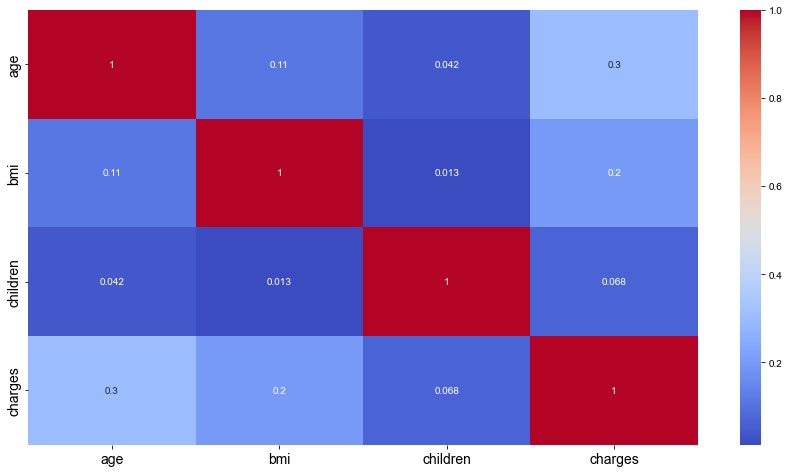

In [10]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Text(0.5, 1.0, 'Compare charges based on sex')

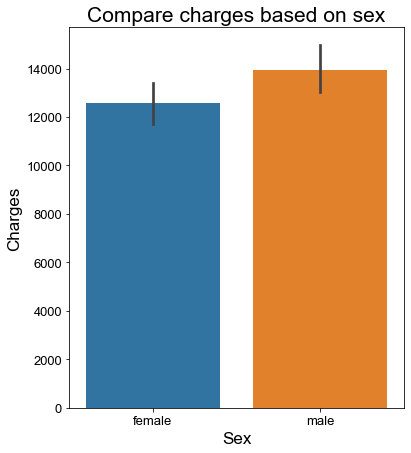

In [11]:
plt.figure(figsize = (6,7))
sns.barplot(data = df, x = "sex", y = "charges")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Sex", fontsize = 17)
plt.ylabel("Charges", fontsize = 17)
plt.title("Compare charges based on sex", fontsize = 21)

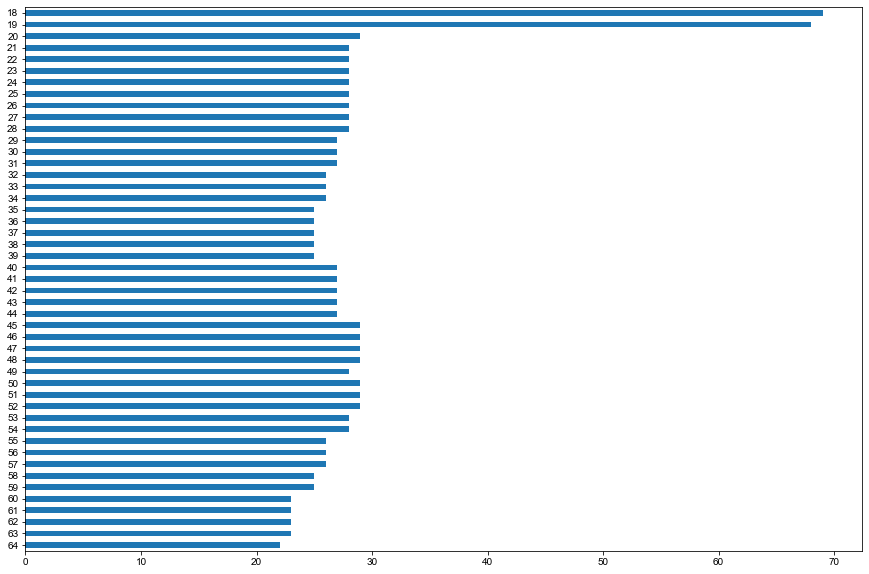

In [12]:
df.age.value_counts().sort_index(ascending = False).plot(kind = 'barh', figsize = (15, 10))
plt.show()

<AxesSubplot:>

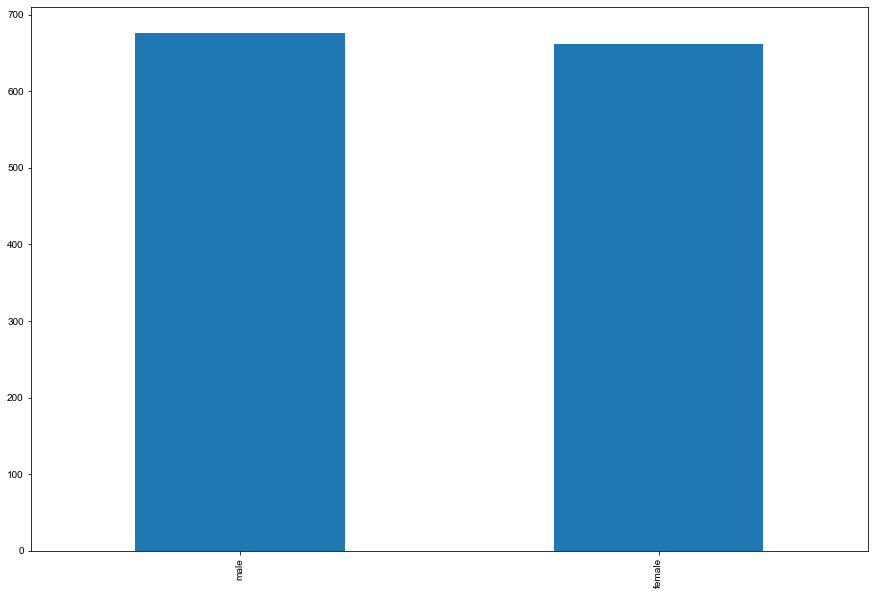

In [13]:
df.sex.value_counts().plot(kind = 'bar', figsize = (15, 10))

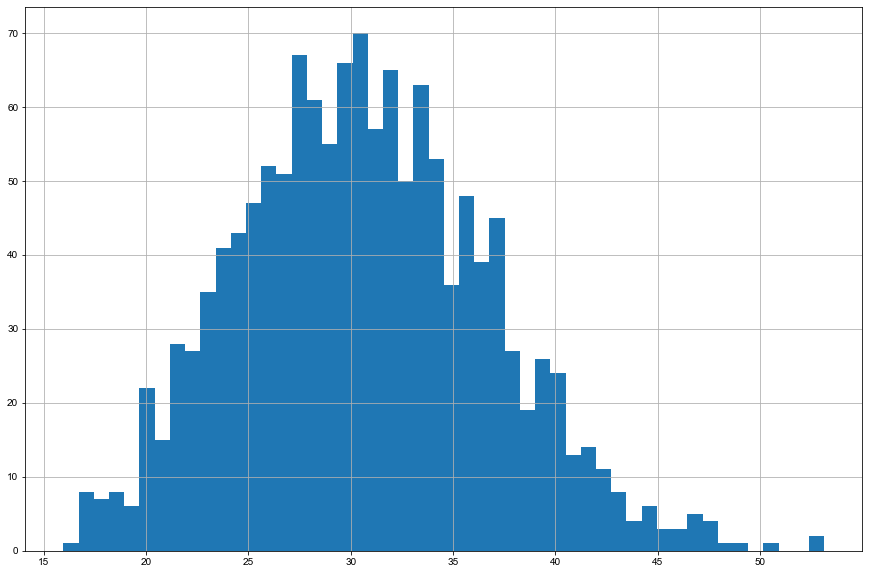

In [14]:
df.bmi.hist(bins = 50, figsize = (15, 10))
plt.show()

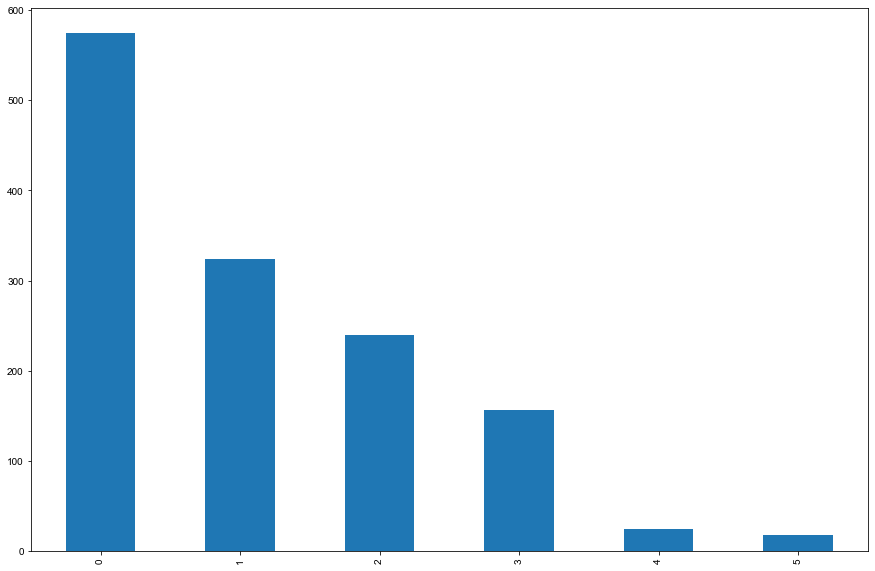

In [15]:
df.children.value_counts().sort_index().plot(kind = 'bar', figsize = (15, 10))
plt.show()

<AxesSubplot:>

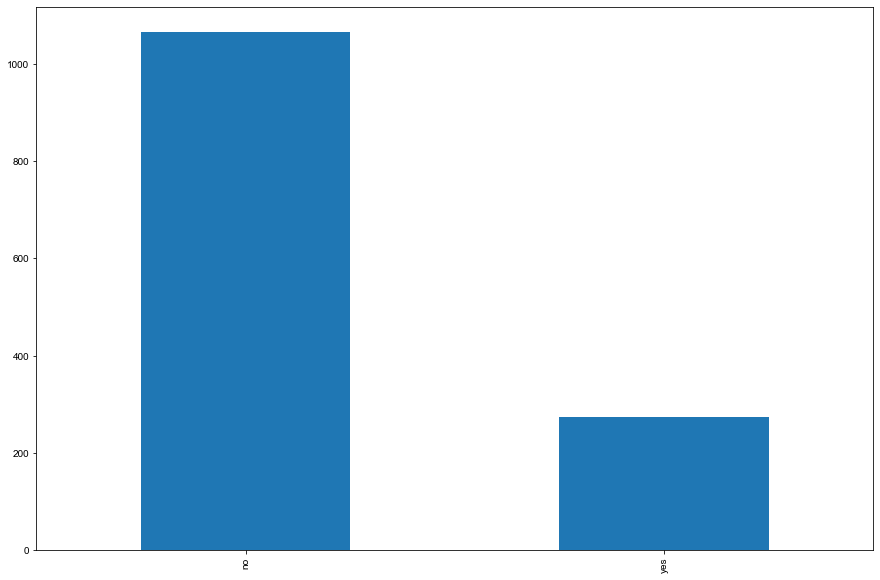

In [16]:
df.smoker.value_counts().plot(kind = 'bar', figsize = (15, 10))

<AxesSubplot:>

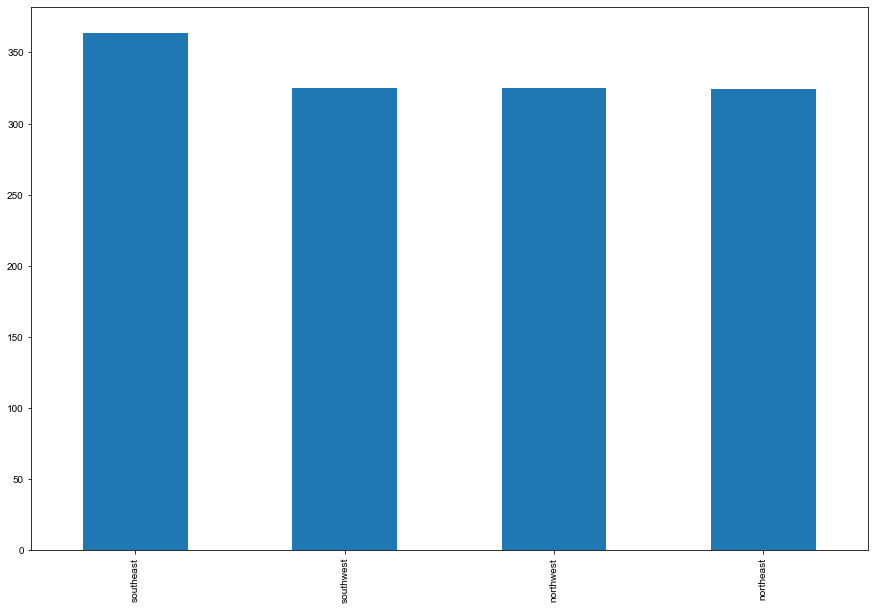

In [17]:
df.region.value_counts().plot(kind = 'bar', figsize = (15, 10))

<AxesSubplot:>

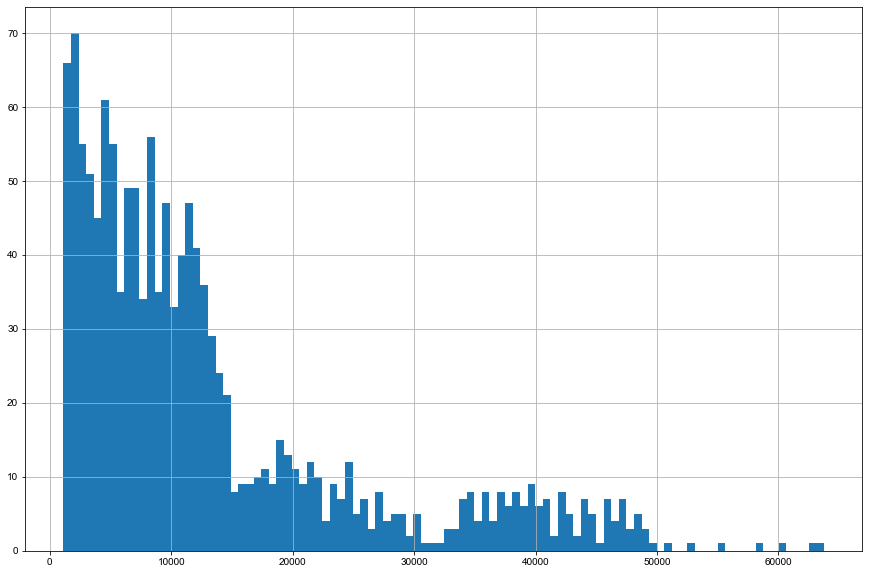

In [18]:
df.charges.hist(bins = 100, figsize = (15, 10))

# Feature Importance

# Model Prediction

## Preparation

In [19]:
df.sex = df.sex.map({"female": 1, "male": 0})
df.region = df.region.map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df.smoker = df.smoker.map({"yes": 1, "no": 0})

In [20]:
# df = pd.get_dummies(df, columns = ['sex', 'region', 'smoker'])

In [21]:
X = df.drop('charges', axis = 1)
y = df.charges

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs)

In [23]:
print(f'X train size: {len(X_train)} || y train size: {len(y_train)}')
print(f'X test size: {len(X_test)} || y train size: {len(y_test)}')

X train size: 1003 || y train size: 1003
X test size: 335 || y train size: 335


## 00 Dummy Model

In [24]:
dummy = DummyRegressor(strategy = 'mean')

In [25]:
mae_dummy, mse_dummy, rmse_dummy = run_model(dummy)

MAE: 9668.122
MSE: 174387341.422
RMSE: 13205.58


## 01 Linear Regression

In [26]:
linreg = LinearRegression()

In [27]:
mae_linreg, mse_linreg, rmse_linreg = run_model(linreg)

MAE: 4532.344
MSE: 43075124.028
RMSE: 6563.164


## 02 RandomForestRegressor

In [28]:
randomreg = RandomForestRegressor(random_state = rs)

In [29]:
mae_rfr, mse_rfr, rmse_rfr = run_model(randomreg)

MAE: 2766.848
MSE: 27880108.916
RMSE: 5280.162


### RandomForestRegressor Tuning

In [30]:
randomreg = RandomForestRegressor(random_state = rs)

params = {
    'n_estimators': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 4, 8],
    'bootstrap': [True, False]
}

rfr_search = GridSearchCV(randomreg,
                          params, 
                          scoring = 'neg_root_mean_squared_error',
                          error_score = 'raise',
                          n_jobs = -1,
                          verbose = 0,
                          cv = 5)

rfr_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42847), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_root_mean_squared_error')

In [31]:
rfr_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 30}

In [32]:
rfr_model = rfr_search.best_estimator_
mae_rfr, mse_rfr, rmse_rfr = run_model(rfr_model)

MAE: 2720.655
MSE: 26969677.322
RMSE: 5193.234


## 03 Ridge Regression

In [33]:
ridge = Ridge(random_state = rs)
mae_ridge, mse_ridge, rmse_ridge = run_model(ridge)

MAE: 4542.96
MSE: 43100886.662
RMSE: 6565.127


### Ridge Regression Tuning

In [34]:
for i in [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100]:
    ridge = Ridge(random_state = rs, alpha = i)
    print(f'alpha = {i}')
    run_model(ridge)
    print("---")

alpha = 0.001
MAE: 4532.355
MSE: 43075145.574
RMSE: 6563.166
---
alpha = 0.01
MAE: 4532.451
MSE: 43075339.877
RMSE: 6563.181
---
alpha = 0.1
MAE: 4533.41
MSE: 43077320.96
RMSE: 6563.332
---
alpha = 0.5
MAE: 4537.659
MSE: 43086957.264
RMSE: 6564.066
---
alpha = 1.0
MAE: 4542.96
MSE: 43100886.662
RMSE: 6565.127
---
alpha = 10
MAE: 4640.135
MSE: 43666376.453
RMSE: 6608.054
---
alpha = 100
MAE: 5481.88
MSE: 60500857.665
RMSE: 7778.23
---


In [35]:
ridge = Ridge(random_state = rs, alpha = 0.01)
mae_ridge, mse_ridge, rmse_ridge = run_model(ridge)

MAE: 4532.451
MSE: 43075339.877
RMSE: 6563.181


## 04 Lasso Regression

In [36]:
lasso = Lasso(random_state = rs)
mae_lasso, mse_lasso, rmse_lasso = run_model(lasso)

MAE: 4532.579
MSE: 43074041.263
RMSE: 6563.082


### Lasso Regression Tuning

In [37]:
for i in [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100]:
    lasso = Lasso(random_state = rs, alpha = i)
    print(f'alpha = {i}')
    run_model(lasso)
    print("---")

alpha = 0.001
MAE: 4532.344
MSE: 43075122.934
RMSE: 6563.164
---
alpha = 0.01
MAE: 4532.346
MSE: 43075113.094
RMSE: 6563.163
---
alpha = 0.1
MAE: 4532.368
MSE: 43075014.734
RMSE: 6563.156
---
alpha = 0.5
MAE: 4532.461
MSE: 43074579.948
RMSE: 6563.123
---
alpha = 1.0
MAE: 4532.579
MSE: 43074041.263
RMSE: 6563.082
---
alpha = 10
MAE: 4535.494
MSE: 43072274.388
RMSE: 6562.947
---
alpha = 100
MAE: 4569.692
MSE: 43154246.476
RMSE: 6569.189
---


In [38]:
lasso = Lasso(random_state = rs, alpha = 100)
mae_lasso, mse_lasso, rmse_lasso = run_model(lasso)

MAE: 4569.692
MSE: 43154246.476
RMSE: 6569.189


## 05 Bayesian Ridge Regression

In [39]:
bayrid = BayesianRidge()
mae_br, mse_br, rmse_br = run_model(bayrid)

MAE: 4536.282
MSE: 43083681.535
RMSE: 6563.816


### Bayesian Ridge Regression Tuning

In [40]:
bayrid = BayesianRidge()

params = {
    'n_iter': [10, 100, 300, 500, 1000, 5000],
    'alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
    'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]
}

bayrid_search = GridSearchCV(bayrid,
                          params, 
                          scoring = 'neg_root_mean_squared_error',
                          error_score = 'raise',
                          n_jobs = -1,
                          verbose = 0,
                          cv = 5)

bayrid_search.fit(X_train, y_train)

bayrid_search = bayrid_search.best_estimator_
mae_br, mse_br, rmse_br = run_model(bayrid_search)

MAE: 4536.282
MSE: 43083681.535
RMSE: 6563.816


## 06 Support Vector Regression

In [41]:
svr = SVR()
mse_svr, mse_svr, rmse_svr = run_model(svr)

MAE: 9470.777
MSE: 200933637.018
RMSE: 14175.106


### Support Vector Regression Tuning

In [42]:
svr = SVR()

params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [1, 2, 3],
    'coef0': [0, 100],
    'C': [0.5, 1, 5],
    'epsilon': [0.1, 0.5]
}

svr_search = GridSearchCV(svr,
                          params, 
                          scoring = 'neg_root_mean_squared_error',
                          error_score = 'raise',
                          n_jobs = -1,
                          verbose = 0,
                          cv = 5)

svr_search.fit(X_train, y_train)

svr_search = svr_search.best_estimator_
mse_svr, mse_svr, rmse_svr = run_model(svr_search)

MAE: 4400.925
MSE: 85193386.641
RMSE: 9230.026


# Results

In [43]:
metrics = {
    'DummyModel': rmse_dummy,
    'LinearRegression': rmse_linreg,
    'RandomForestRegressor': rmse_rfr,
    'RidgeRegression': rmse_ridge,
    'LassoRegression': rmse_lasso,
    'BayesianRegression': rmse_br,
    'SupportVectorRegression': rmse_svr
}

In [44]:
df_metrics = pd.DataFrame(metrics.items(), columns = ['Model', 'RMSE'])
df_metrics.sort_values('RMSE')

,Model,RMSE
2,RandomForestRegressor,5193.233802
1,LinearRegression,6563.164178
3,RidgeRegression,6563.180622
5,BayesianRegression,6563.816080
4,LassoRegression,6569.189179
6,SupportVectorRegression,9230.026362
0,DummyModel,13205.579935


From the above table, we see that the model that gives us the least _Root Mean Squared Error_ is the RandomForestRegressor. So let's go ahead and save it.

# Saving the Model

Our best model is the **"rfr_model"**, the RandomForestRegressor model obtained from de GridSearchCV.

In [45]:
model = rfr_model
output_file = 'model_randomforestregressor.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump(model, f_out)